In [22]:
%pip install fastai --quiet

Note: you may need to restart the kernel to use updated packages.


In [10]:
from tqdm import tqdm
import math
from pathlib import Path
from fastai import *
from fastai.vision.all import *
from fastai.data.all import *
from pathlib import Path
from PIL import Image
import math

In [2]:
import warnings
import os
import numpy as np
import torch

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
data_path = Path('./data/new_crops/')

In [28]:
fns = get_image_files(data_path)

In [29]:
failed = verify_images(fns)

In [30]:
failed

(#0) []

In [13]:
#failed.map(Path.unlink);

In [31]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=seed),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [32]:
dls = db.dataloaders(data_path)

/home/21rfk/project/mtcnn-pytorch/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [33]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

SuggestedLRs(valley=0.00363078061491251)

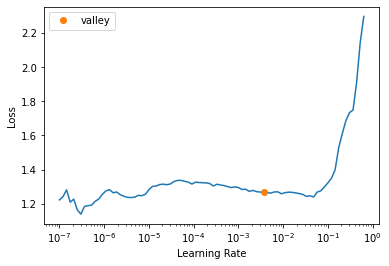

In [17]:
learn.lr_find()

In [38]:
lr = 3e-3
learn = cnn_learner(dls, resnet18, metrics=accuracy, lr=lr)
learn.fine_tune(2, freeze_epochs=6)

epoch,train_loss,valid_loss,accuracy,time
0,1.289555,0.847307,0.533849,00:04
1,1.182469,0.845355,0.558994,00:04
2,1.132558,0.798843,0.615087,00:04
3,1.056432,0.818400,0.626692,00:04
4,0.966829,0.723089,0.624758,00:04
5,0.880592,0.722565,0.626692,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.700404,0.731853,0.626692,00:04
1,0.665458,0.689781,0.663443,00:04


In [17]:
dls.train

In [39]:
train_loss, train_accuracy = learn.validate(dl=dls.train)
train_accuracy

0.7294921875

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

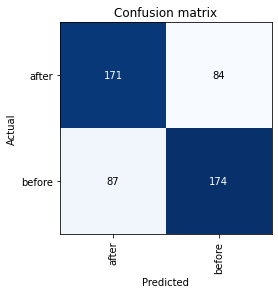

In [20]:
interp.plot_confusion_matrix()

In [40]:
learn.model_dir = "saved_model"
learn.export("./saved_model/before_after.pkl")

In [41]:
from fastai.learner import *

In [4]:
learn_inf = load_learner("saved_model/before_after.pkl")

In [5]:
from IPython.display import display

In [11]:
def predict(fn, scale=1):
    sample_dir = Path("./sample_images")
    before = sample_dir / fn
    
    img = Image.open(before)
    img = img.resize((math.floor(img.shape[1] * scale), math.floor(img.shape[0] * scale)))
    display(img)
    return learn_inf.predict(before)

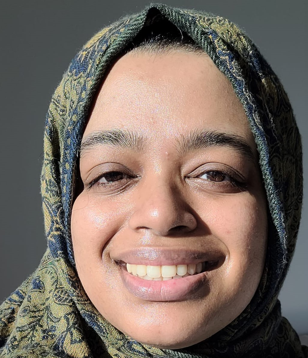

('after', TensorBase(0), TensorBase([0.5080, 0.4920]))

In [12]:
predict("mustabeen_no_makeup.jpeg", scale=0.3)

('after', TensorBase(0), TensorBase([0.7158, 0.2842]))


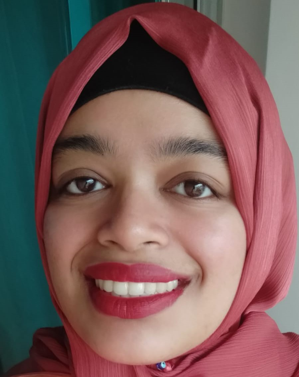

In [59]:
after = sample_dir / "mustabeen_makeup.jpeg"
print(learn_inf.predict(after))
img = Image.open(after)
display(img.resize((img.shape[1] // 3, img.shape[0] // 3)))

('before', TensorBase(1), TensorBase([0.2505, 0.7495]))


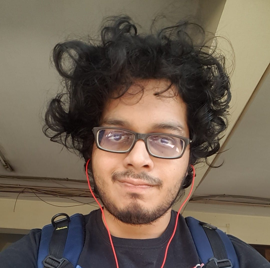

In [65]:
sample_dir = Path("./sample_images")
before = sample_dir / "rohan-old.jpg"
print(learn_inf.predict(before))
img = Image.open(before)
display(img.resize((img.shape[1] // 4, img.shape[0] // 4)))

('before', TensorBase(1), TensorBase([0.1670, 0.8330]))


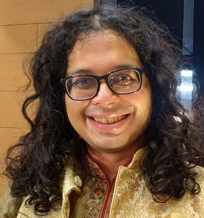

In [64]:
sample_dir = Path("./sample_images")
after = sample_dir / "rohan.jpg"
print(learn_inf.predict(after))
img = Image.open(after)
display(img.resize((img.shape[1] // 2, img.shape[0] // 2)))

('before', TensorBase(1), TensorBase([0.1615, 0.8385]))


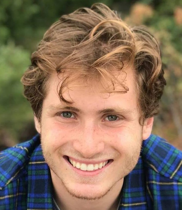

In [84]:
sample_dir = Path("./sample_images")
before = sample_dir / "sam_no_beard.png"
print(learn_inf.predict(before))
img = Image.open(before)
display(img.resize((img.shape[1] // 4, img.shape[0] // 4)))

('before', TensorBase(1), TensorBase([0.1503, 0.8497]))


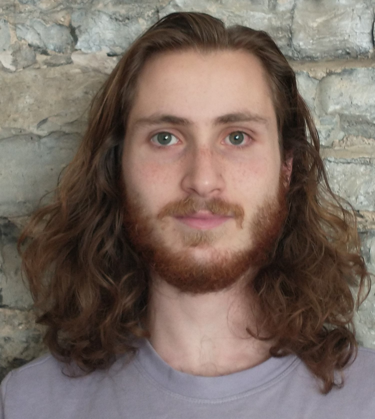

In [87]:
sample_dir = Path("./sample_images")
after = sample_dir / "sam_beard_2.jpg"
print(learn_inf.predict(after))
img = Image.open(after)
display(img.resize((img.shape[1] // 4, img.shape[0] // 4)))

('before', TensorBase(1), TensorBase([0.2445, 0.7555]))


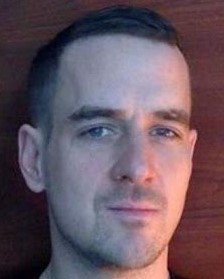

In [8]:
sample_dir = Path("./sample_images")
before = sample_dir / "alex-2.jpg"
print(learn_inf.predict(before))
img = Image.open(before)
display(img.resize((img.shape[1], img.shape[0])))

('after', TensorBase(0), TensorBase([0.6266, 0.3734]))


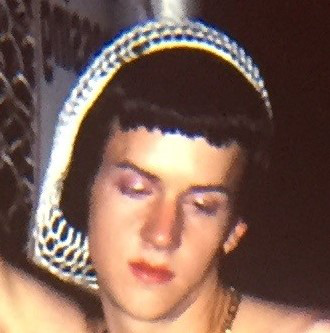

In [14]:
sample_dir = Path("./sample_images")
after = sample_dir / "alex-drag-2.jpg"
print(learn_inf.predict(after))
img = Image.open(after)
display(img.resize((img.shape[1], img.shape[0])))

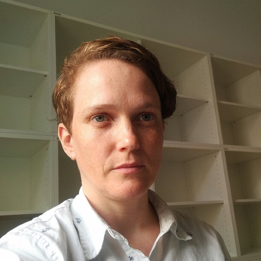

('before', TensorBase(1), TensorBase([0.1025, 0.8975]))

In [14]:
predict("catherine_2.jpg", scale=0.3)

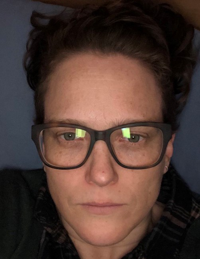

('before', TensorBase(1), TensorBase([0.2447, 0.7553]))

In [17]:
predict("catherine-glasses-2.png", scale=0.4)

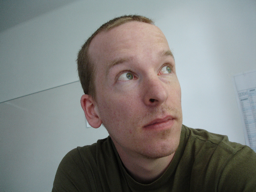

('before', TensorBase(1), TensorBase([0.1171, 0.8829]))

In [18]:
predict("haircut_after.png", scale=0.4)

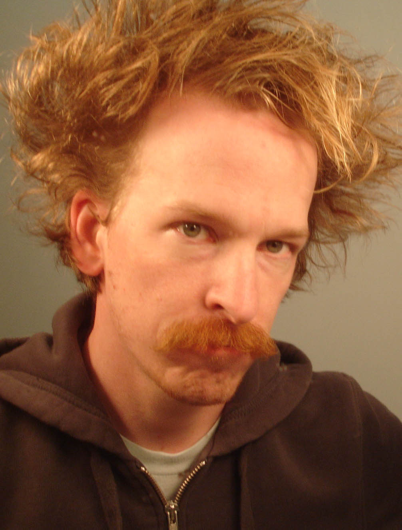

('before', TensorBase(1), TensorBase([0.1590, 0.8410]))

In [19]:
predict("haircut_before.png", scale=0.4)

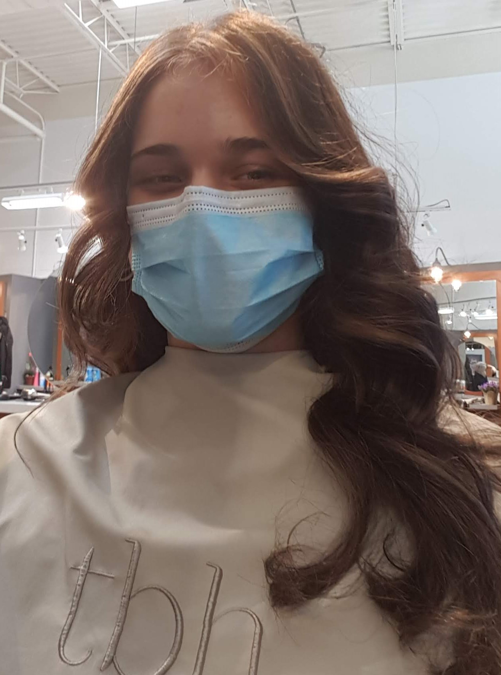

('after', TensorBase(0), TensorBase([0.8427, 0.1573]))

In [34]:
predict("georgia_after_2 (2).jpg", scale=0.4)

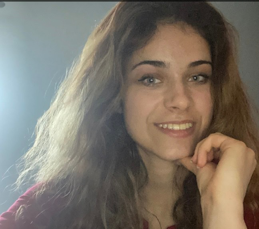

('before', TensorBase(1), TensorBase([0.4384, 0.5616]))

In [31]:
predict("georgia_before_3.jpg", scale=0.4)